In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input, Dense



In [2]:
# can you predict whether a wine is red or white by looking at its chemical properties?

In [3]:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';') 
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [4]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [5]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [6]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [8]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [10]:
redlabels = np.unique(red['quality'])
len(redlabels)

6

In [11]:
whitelabels = np.unique(white['quality'])
len(whitelabels)

7

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

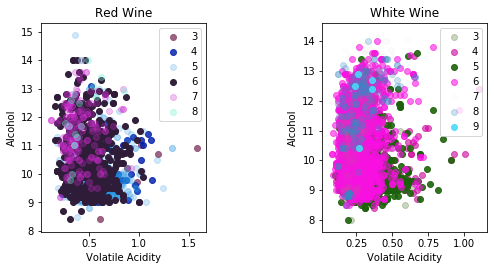

In [12]:
np.random.seed(100)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

redvine_col = np.random.rand(6,4)
whitevine_col = np.append(np.random.rand(6,4), np.random.rand(1,4), axis=0)

for i in range(len(redvine_col)):
    redy = red['alcohol'][red.quality == redlabels[i]]
    redx = red['volatile acidity'][red.quality == redlabels[i]]
    ax[0].scatter(redx, redy, c = redvine_col[i])
    
for i in range(len(whitevine_col)):
    whitey = white['alcohol'][white.quality == whitelabels[i]]
    whitex = white['volatile acidity'][white.quality == whitelabels[i]]
    ax[1].scatter(whitex, whitey,  c = whitevine_col[i])

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")

ax[0].set_xlabel("Volatile Acidity")
ax[0].set_ylabel("Alcohol")
ax[1].set_xlabel("Volatile Acidity")
ax[1].set_ylabel("Alcohol")

ax[0].legend(redlabels, loc='best')
ax[1].legend(whitelabels, loc='best')
#ax[1].legend(whitelabels, loc='best', bbox_to_anchor=(1.3, 1))

fig.subplots_adjust(top=0.85, wspace=0.7)

In [13]:
# giving label to data  based on whine type (red or white)
red['type'] = 1
white['type'] = 0
wines = red.append(white, ignore_index=True)
# make sure the ignore index is true for not duplicating the data index when you are joining the data table

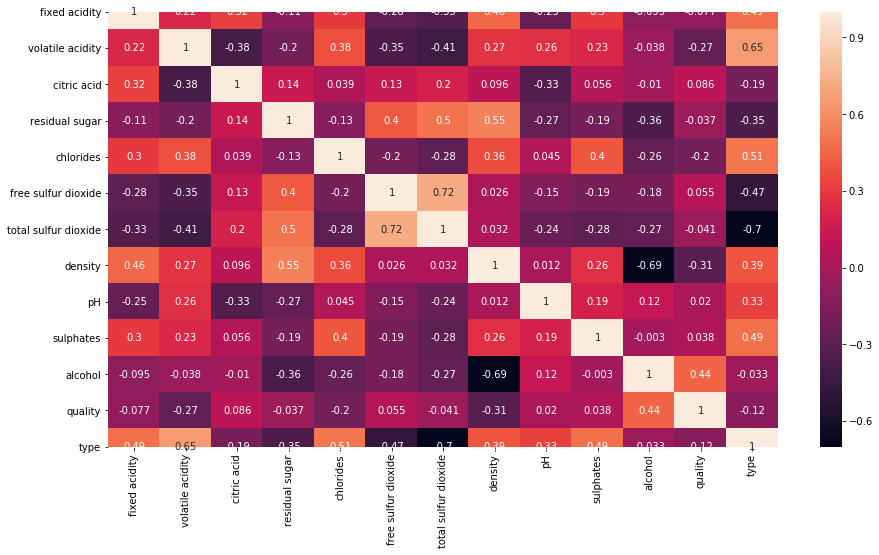

In [14]:
corrn = wines.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corrn, xticklabels=corrn.columns.values,yticklabels=corrn.columns.values,
           annot=True)


In [15]:
X=wines.ix[:,0:11]

C:\Users\sidha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\sidha\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


In [16]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [17]:
y=np.ravel(wines.type)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
scaler = StandardScaler().fit(X_train)
# Standardize features by removing the mean and scaling to unit variance
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

In [20]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# inititalising the constructor
# we can create tke model by passing list of layer instances to constructor which can se bet by running

# linear stack of layers
# a = Input(shape=(32,))
# b = Dense(32)(a)
# Model(inputs=a, outputs=b)
# This model will include all layers required in the computation of b given a.

# in multi input and multi output models: you can do:
#model = Model(inputs=[a1, a2], outputs=[b1, b2, b3])

# multi-layer perceptron
# you have an input layer, some hidden layers and an output layer.
# when making a model make sure you take into account for first layer needs to make the input shape clear


In [27]:
# step1: Initialize the constructor
model = Sequential()
# step2: adding an input layer 
# in first layer activation argument takes the called 'relu'
#input shape is defined too (here 11)
# 12 as the first value of units (hidden units) argument of dense
# units agenerally represents kernel of the weights matrix (composed of all weights given to all input nodes, created by layer)

# in short : now the model will take as input arrays of shape (*, 11)
# and output arrays of shape (*, 12)
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
# after the first layer, you don't need to specify
# the size of the input anymore:
model.add(Dense(8, activation='relu'))


# Add an output layer 
# we used sigmond actication unction here so that the output is probability
# score si between 0 to 1, indicating how likely is teh varible to have red wine or white wine
model.add(Dense(1, activation='sigmoid'))


# summary: All in all, you see that there are two key architecture decisions that you need to make to make your model: 
# how many layers you’re going to use and how many “hidden units” you will chose for each layer

In [29]:
# Model output shape
model.output_shape
# Model summary
model.summary()
# Model config
model.get_config()
# List all weight tensors 
model.get_weights()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


[array([[-0.16526866, -0.28017133,  0.28066123, -0.36189675,  0.01772493,
         -0.11700311,  0.15859365, -0.4314323 , -0.4984452 , -0.24189398,
          0.1015349 ,  0.20964235],
        [-0.39139912,  0.03704488,  0.37269962, -0.33344287,  0.3594944 ,
         -0.41805175, -0.00603741,  0.18433583,  0.4497196 ,  0.38061965,
         -0.1096032 , -0.048329  ],
        [ 0.21758914, -0.415466  ,  0.0693444 , -0.170012  , -0.03528768,
          0.34134263, -0.21942744,  0.15450317,  0.12607378,  0.31550664,
         -0.1523568 , -0.34327507],
        [-0.36715454, -0.09443781, -0.41164503,  0.10042369, -0.41047028,
          0.44581592,  0.03336489, -0.2142388 , -0.26895297,  0.4432028 ,
         -0.12760934, -0.3094886 ],
        [-0.4563224 , -0.02824116,  0.03044647, -0.3609764 , -0.22432858,
         -0.12741217, -0.30740273, -0.09416273, -0.09690008, -0.09704402,
          0.2651952 , -0.06050292],
        [ 0.4169665 , -0.20618814, -0.45656824, -0.2374433 , -0.48859704,
      

In [30]:
# compile the model andthen fit the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)
# An epoch is an iteration over the entire x_train and y_train data provided
# verbose: you can see the progres bar each epock if you set it tp 1

Epoch 1/20
4352/4352 [==============================] - 14s 3ms/step - loss: 0.0932 - accuracy: 0.9750
Epoch 2/20
4352/4352 [==============================] - 12s 3ms/step - loss: 0.0252 - accuracy: 0.9956
Epoch 3/20
4352/4352 [==============================] - 18s 4ms/step - loss: 0.0205 - accuracy: 0.9956
Epoch 4/20
4352/4352 [==============================] - 23s 5ms/step - loss: 0.0201 - accuracy: 0.9956
Epoch 5/20
4352/4352 [==============================] - 23s 5ms/step - loss: 0.0171 - accuracy: 0.9963
Epoch 6/20
4352/4352 [==============================] - 23s 5ms/step - loss: 0.0150 - accuracy: 0.9970
Epoch 7/20
4352/4352 [==============================] - 23s 5ms/step - loss: 0.0143 - accuracy: 0.9972
Epoch 8/20
4352/4352 [==============================] - 23s 5ms/step - loss: 0.0128 - accuracy: 0.9972
Epoch 9/20
4352/4352 [==============================] - 23s 5ms/step - loss: 0.0132 - accuracy: 0.9968
Epoch 10/20
4352/4352 [==============================] - 23s 5ms/step - l

In [31]:
# note: if you want to compile the model you want to optimizer and loss are required
# popular optimization algorithms used are the Stochastic Gradient Descent (SGD), ADAM and RMSprop
# for loss: for a regression problem, you’ll usually use the Mean Squared Error (MSE)
# binary_crossentropy for binary classification
# with multi-class classification, you’ll make use of categorical_crossentropy

#An epoch is a single pass through the entire training set, followed by testing of the verification set
# batch size: number of samples that going to be propagated through the network.

In [32]:
y_pred = model.predict(X_test)

In [33]:
# evaluating the model:
score = model.evaluate(X_test, y_test,verbose=1)
# combination of the loss and the accuracy
print(score)

2145/2145 [==============================] - 0s 47us/step
[0.02978021866931247, 0.9953380227088928]
